# 13 Euler-Maclaurinの和公式

黒木玄

2018-07-04

* Copyright 2018 Gen Kuroki
* License: MIT https://opensource.org/licenses/MIT

このファイルは次の場所できれいに閲覧できる:

* http://nbviewer.jupyter.org/github/genkuroki/Calculus/blob/master/13%20Euler-Maclaurin%20summation%20formula.ipynb

このファイルは <a href="https://juliabox.com">Julia Box</a> で利用できる.

自分のパソコンに<a href="https://julialang.org/">Julia言語</a>をインストールしたい場合には

* <a href="http://nbviewer.jupyter.org/gist/genkuroki/81de23edcae631a995e19a2ecf946a4f">WindowsへのJulia言語のインストール</a>

を参照せよ.

論理的に完璧な説明をするつもりはない. 細部のいい加減な部分は自分で訂正・修正せよ.

$
\newcommand\eps{\varepsilon}
\newcommand\ds{\displaystyle}
\newcommand\Z{{\mathbb Z}}
\newcommand\R{{\mathbb R}}
\newcommand\C{{\mathbb C}}
\newcommand\QED{\text{□}}
\newcommand\root{\sqrt}
\newcommand\bra{\langle}
\newcommand\ket{\rangle}
\newcommand\d{\partial}
\newcommand\sech{\operatorname{sech}}
\newcommand\cosec{\operatorname{cosec}}
\newcommand\sign{\operatorname{sign}}
\newcommand\real{\operatorname{Re}}
\newcommand\imag{\operatorname{Im}}
$

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bernoulli多項式" data-toc-modified-id="Bernoulli多項式-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bernoulli多項式</a></span><ul class="toc-item"><li><span><a href="#Bernoulli多項式の定義" data-toc-modified-id="Bernoulli多項式の定義-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Bernoulli多項式の定義</a></span></li><li><span><a href="#Bernoulli多項式の基本性質" data-toc-modified-id="Bernoulli多項式の基本性質-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Bernoulli多項式の基本性質</a></span></li><li><span><a href="#べき乗和" data-toc-modified-id="べき乗和-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>べき乗和</a></span></li></ul></li><li><span><a href="#Euler-Maclaurinの和公式" data-toc-modified-id="Euler-Maclaurinの和公式-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Euler-Maclaurinの和公式</a></span><ul class="toc-item"><li><span><a href="#Euler-Maclaurinの和公式の導出" data-toc-modified-id="Euler-Maclaurinの和公式の導出-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Euler-Maclaurinの和公式の導出</a></span></li><li><span><a href="#Euler-Maclaurinの和公式の2つの解釈" data-toc-modified-id="Euler-Maclaurinの和公式の2つの解釈-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Euler-Maclaurinの和公式の2つの解釈</a></span></li><li><span><a href="#べき乗和(再)" data-toc-modified-id="べき乗和(再)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>べき乗和(再)</a></span></li></ul></li><li><span><a href="#ゼータ函数への応用" data-toc-modified-id="ゼータ函数への応用-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>ゼータ函数への応用</a></span><ul class="toc-item"><li><span><a href="#解析接続" data-toc-modified-id="解析接続-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>解析接続</a></span></li><li><span><a href="#s-=-1での様子" data-toc-modified-id="s-=-1での様子-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>s = 1での様子</a></span></li></ul></li></ul></div>

In [1]:
using Plots
gr(); ENV["PLOTS_TEST"] = "true"
#clibrary(:colorcet)
clibrary(:misc)

function pngplot(P...; kwargs...)
    sleep(0.1)
    pngfile = tempname() * ".png"
    savefig(plot(P...; kwargs...), pngfile)
    showimg("image/png", pngfile)
end
pngplot(; kwargs...) = pngplot(plot!(; kwargs...))

showimg(mime, fn) = open(fn) do f
    base64 = base64encode(f)
    display("text/html", """<img src="data:$mime;base64,$base64">""")
end

using SymPy
#sympy[:init_printing](order="lex") # default
#sympy[:init_printing](order="rev-lex")

using SpecialFunctions
using QuadGK

## Bernoulli多項式

### Bernoulli多項式の定義

**定義(Bernoulli多項式):** Bernoulli多項式** $B_n(x)$ ($n=0,1,2,\ldots$)を

$$
\frac{ze^{zx}}{e^z-1} = \sum_{n=0}^\infty \frac{B_n(x)}{n!}x^n
$$

によって定義する. $\QED$



### Bernoulli多項式の基本性質

**一般化Bernoulli多項式の基本性質:** Bernoulli多項式 $B_n(x)$ は以下の性質を満たしている:

(1) $B_0(x)=1$.

(2) $\ds\int_0^1 B_n(x)\,dx = \delta_{n,0}$.

(3) $\ds B_n(x+h) = \sum_{k=0}^n\binom{n}{k}B_{n-k}(x)h^k = 
\sum_{k=0}^n \binom{n}{k} B_k(x) h^{n-k}$.

(4) $B_n'(x)=nB_{n-1}(x)$.

(5) $\ds B_n(x+1)=B_n(x)+nx^{n-1}$.

(6) $B_n(1-x)=(-1)^n B_n(x)$.

(7) $B_n(1)=B_n(0)+\delta_{n,1}$ となる.

(8) $B_n(0)=1$, $\ds B_n(0)=-\frac{1}{2}$ とな, $n$ が3以上の奇数ならば $B_n(0)=0$ となる.

**証明:** (1) $e^{zx}=1+O(z)$, $\ds\frac{e^z-1}{z}=1+O(z)$ より, $\ds\frac{ze^{zx}}{e^z-1}=1+O(z)$ なので $B_0(x) = 1$.

(2)を示そう.

$$
\begin{aligned}
&
\int_0^1 \frac{ze^{zx}}{e^z-1}\,dx = \frac{z}{e^z-1}\int_0^1 e^{zx}\,dx = 
\frac{z}{e^z-1}\frac{e^z-1}{z} = 1, 
\\ &
\int_0^1\frac{ze^{zx}}{e^z-1}\,dx = \sum_{n=0}^\infty\frac{z^n}{n!}\int_0^1 B_n(x)\,dx
\end{aligned}
$$

なので, これらを比較して $\ds\int_0^1 B_n(x)\,dx = \delta_{n,0}$.

(3) 二項定理より,

$$
\int_0^1 (x+y)^n\,dy = 
\sum_{k=0}^n \binom{n}{k} x^{n-k} \int_0^1 y^k\,dy.
$$

ゆえに, $x$ の函数を $x$ の函数に移す線形写像(前方移動平均)

$$
f(x)\mapsto \int_0^1 f(x+y)\,dy
$$

は多項式を多項式に移し, 最高次の係数が1の多項式を最高次の係数が1の同次の多項式に移す. これより, 線形写像 $\ds f(x)\mapsto \int_0^1 f(x+y)\,dy$ は多項式どうしの一対一対応を与える線形写像になっていることがわかる. そして,

$$
\begin{aligned}
&
\int_0^1\frac{ze^{z(x+y)}}{e^z-1}\,dx = 
\sum_{n=0}^\infty\frac{\int_0^1 B_n(x+y)\,dy}{n!}z^n, 
\\ &
\int_0^1\frac{ze^{z(x+y)}}{e^z-1}\,dx = 
\frac{ze^{zx}}{e^z-1}\int_0^1 e^{zy}\,dy =
\frac{ze^{zx}}{e^z-1}\frac{e^z-1}{z} =
e^{zx} =
\sum_{n=0}^\infty \frac{x^n}{n!}z^n
\end{aligned}
$$

なので, これらを比較して,

$$
\int_0^1 B_n(x+y)\,dy = x^n
$$

が成立することがわかる. ゆえに, 

$$
\int_0^1 B_n(x+h+y)\,dy = (x+h)^n = \sum_{k=0}^n \binom{n}{k}x^{n-k}h^k =
\int_0^1 \sum_{k=0}^n \binom{n}{k}B_{n-k}(x+y)h^k \,dy
$$

より

$$
B_n(x+h) = \sum_{k=0}^n \binom{n}{k}B_{n-k}(x)h^k.
$$

(4) すぐ上の等式の右辺の $h$ の係数を見ることによって,

$$
B_n'(x) = n B_{n-1}(x).
$$

(5) Bernoulli多項式の母函数の $x$ に $x+1$ を代入すると,

$$
\frac{ze^{z(x+1)}}{e^z-1} = \frac{ze^z e^{zx}}{e^z-1} =
\frac{z(1+(e^z-1))e^{zx}}{e^z-1} = \frac{ze^{zx}}{e^z-1} + ze{zx}
$$

なので両辺を $z$ について展開して比較すれば(5)が得られる.

(6) Bernoulli多項式の母函数の $x$ に $1-x$ を代入すると,

$$
\frac{ze^{z(1-x)}}{e^z-1} = \frac{ze^z e^{-zx}}{e^z-1} =
\frac{ze^{-zx}}{1-e^{-z}} = \frac{-ze^{-zx}}{e^{-z}-1}
$$

とBernoulli多項式の母函数の $z$ に $-z$ を代入したものになるので, 両辺を $z$ について展開して比較すれば(5)が得られる.

(7) 上の(2)と(4)より, $n$ が2以上のとき,

$$
B_n(1)-B_n(0) = \int_0^1 B_n'(x)\,dx = n\int_0^1 B_{n-1}(x)\,dx = n\delta_{n-1,0} = \delta_{n,1}
$$

ゆえに $n$ が2以上のとき $B_n(1)=B_n(0)+\delta_{n,1}$.

(8) 次の函数が $z$ の偶函数で $z\to 0$ で $1$ になることから, (6)が得られる:

$$
\frac{z}{e^z-1} + \frac{z}{2} = \frac{z}{2}\frac{e^{z/2}+e^{-z/2}}{e^{z/2}-e^{-z/2}}.
\qquad \QED
$$

**注意:** $B_n=B_n(0)$ は**Bernoulli数**と呼ばれている. (3)で $(x,h)$ を $(0,x)$ で置き換えると, Bernoulli多項式がBernoulli数で表わされることがわかる:

$$
B_n(x) = \sum_{k=0}^n \binom{n}{k}B_k x^{n-k}.
$$

上の定理の条件(1),(2),(4)によってBernoulli多項式 $B_n(x)$ が $n$ について帰納的に一意的に決まる. $\QED$

**例:** 
$$
B_0 = 1, \quad B_1 = -\frac{1}{2}, \quad
B_2 = \frac{1}{6}, \quad B_3=0, \quad B_4 = -\frac{1}{30}
$$

なので

$$
\begin{aligned}
&
B_0(x)=1, \quad 
B_1(x)=x-\frac{1}{2}, \quad
B_2(x)=x^2-x+\frac{1}{6}, 
\\ &
B_3(x)=x^3-\frac{3}{2}x^2+\frac{1}{2}x, \quad
B_4(x)=x^4-2x^3+x^2-\frac{1}{30}.
\qquad\QED
\end{aligned}
$$

In [2]:
BernoulliPolynomial(n,x) = sympy[:bernoulli](n,x)
x = symbols("x", real=true)
[BernoulliPolynomial(n,x) for n in 0:10]

11-element Array{SymPy.Sym,1}:
                                                        1
                                                  x - 1/2
                                            x^2 - x + 1/6
                                      x^3 - 3*x^2/2 + x/2
                                 x^4 - 2*x^3 + x^2 - 1/30
                            x^5 - 5*x^4/2 + 5*x^3/3 - x/6
                     x^6 - 3*x^5 + 5*x^4/2 - x^2/2 + 1/42
                  x^7 - 7*x^6/2 + 7*x^5/2 - 7*x^3/6 + x/6
        x^8 - 4*x^7 + 14*x^6/3 - 7*x^4/3 + 2*x^2/3 - 1/30
        x^9 - 9*x^8/2 + 6*x^7 - 21*x^5/5 + 2*x^3 - 3*x/10
 x^10 - 5*x^9 + 15*x^8/2 - 7*x^6 + 5*x^4 - 3*x^2/2 + 5/66

In [3]:
# (2)

BernoulliPolynomial(n,x) = sympy[:bernoulli](n,x)
x = symbols("x", real=true)
[integrate(BernoulliPolynomial(n,x), (x,0,1)) for n = 0:10]'

1×11 RowVector{Any,ConjArray{Any,1,Array{SymPy.Sym,1}}}:
 1  0  0  0  0  0  0  0  0  0  0

In [4]:
# (3)

BernoulliNumber(n) = sympy[:bernoulli](n)
BernoulliPolynomial(n,x) = sympy[:bernoulli](n,x)
BinomCoeff(n,k) = sympy[:binomial_coefficients_list](n)[k+1]
x, h = symbols("x h", real=true)
[BernoulliPolynomial(n,x) == sum(k->BinomCoeff(n,k)*BernoulliNumber(k)*x^(n-k), 0:n) for n in 0:10]'

1×11 RowVector{Bool,Array{Bool,1}}:
 true  true  true  true  true  true  true  true  true  true  true

In [5]:
# (4)

BernoulliPolynomial(n,x) = sympy[:bernoulli](n,x)
x = symbols("x", real=true)
[diff(BernoulliPolynomial(n,x), x) == n*BernoulliPolynomial(n-1,x) for n = 1:10]'

1×10 RowVector{Bool,Array{Bool,1}}:
 true  true  true  true  true  true  true  true  true  true

In [6]:
# (5)

BernoulliPolynomial(n,x) = sympy[:bernoulli](n,x)
x = symbols("x", real=true)
[simplify(BernoulliPolynomial(n,x+1) - BernoulliPolynomial(n,x)) for n in 0:10]

11-element Array{SymPy.Sym,1}:
      0
      1
    2*x
  3*x^2
  4*x^3
  5*x^4
  6*x^5
  7*x^6
  8*x^7
  9*x^8
 10*x^9

In [7]:
# (6)

BernoulliPolynomial(n,x) = sympy[:bernoulli](n,x)
x = symbols("x", real=true)
[expand(BernoulliPolynomial(n,1-x)) == (-1)^n*BernoulliPolynomial(n,x) for n in 0:10]'

1×11 RowVector{Bool,Array{Bool,1}}:
 true  true  true  true  true  true  true  true  true  true  true

In [8]:
# (7)

BernoulliPolynomial(n,x) = sympy[:bernoulli](n,x)
x = symbols("x", real=true)
[expand(BernoulliPolynomial(n,1)) - BernoulliPolynomial(n,0) for n in 0:10]'

1×11 RowVector{Any,ConjArray{Any,1,Array{SymPy.Sym,1}}}:
 0  1  0  0  0  0  0  0  0  0  0

In [9]:
# (8)

BernoulliNumber(n) = sympy[:bernoulli](n)
[(n, BernoulliNumber(n)) for n in 0:10]

11-element Array{Tuple{Int64,SymPy.Sym},1}:
 (0, 1)    
 (1, -1/2) 
 (2, 1/6)  
 (3, 0)    
 (4, -1/30)
 (5, 0)    
 (6, 1/42) 
 (7, 0)    
 (8, -1/30)
 (9, 0)    
 (10, 5/66)

### べき乗和

$m$ は正の整数であるする. Bernoulli多項式について, 

$$
B_{m+1}(x+1)-B_{m+1}(x) = (m+1)x^m, 
\quad\text{i.e.}\quad
x^m = \frac{B_{m+1}(x+1)-B_{m+1}(x)}{m+1}
$$

が成立しているので, これを $x=0,1,\ldots,n$ について足し上げると,

$$
\sum_{j=1}^n j^m = \frac{B_{m+1}(n+1)-B_{m+1}}{m+1}.
\qquad \QED
$$

In [10]:
PowerSum(m, n) = sum(j->j^m, 1:n)
BernoulliNumber(n) = sympy[:bernoulli](n)
BernoulliPolynomial(n,x) = sympy[:bernoulli](n,x)
PowerSumFormula(m, n) = (BernoulliPolynomial(m+1,n+1)-BernoulliNumber(m+1))/(m+1)
[(m, PowerSum(m,10), PowerSumFormula(m, 10)) for m in 1:10]

10-element Array{Tuple{Int64,Int64,SymPy.Sym},1}:
 (1, 55, 55)                   
 (2, 385, 385)                 
 (3, 3025, 3025)               
 (4, 25333, 25333)             
 (5, 220825, 220825)           
 (6, 1978405, 1978405)         
 (7, 18080425, 18080425)       
 (8, 167731333, 167731333)     
 (9, 1574304985, 1574304985)   
 (10, 14914341925, 14914341925)

## Euler-Maclaurinの和公式

### Euler-Maclaurinの和公式の導出

Bernoulli多項式 $B_n(x)$ とBernoulli数 $B_n$ について

$$
\begin{aligned}
&
B_0(x) = 1, \quad \frac{d}{dx}\frac{B_n(x)}{n!} = \frac{B_{n-1}(x)}{(n-1)!}, 
\\ &
B_1(0)=-\frac{1}{2}, \quad B_1(1)=\frac{1}{2},
\\ &
B_n(1)=B_n(0)=B_n \quad (n=0,2,3,4,5,\ldots) 
\\ &
B_{2j+1} = 0 \quad (j=1,2,3,\ldots)
\end{aligned}
$$

が成立している. 以下ではしばらくのあいだこれらの条件しか使わない.

部分積分を繰り返すことによって,

$$
\begin{aligned}
\int_0^1 f(x)\,dx &= \int_0^1 B_0(x)f(x)\,dx 
\\ &=
[B_1(x)f(x)]_0^1 - \int_0^1 B_1(x)f'(x)\,dx 
\\ &=
[B_1(x)f(x)]_0^1 - \frac{1}{2}[B_2(x)f'(x)]_0^1 + \int_0^1 \frac{B_2(x)}{2}f''(x)\,dx 
\\ &=
[B_1(x)f(x)]_0^1 - \frac{1}{2}[B_2(x)f'(x)]_0^1 + \frac{1}{3!}[B_3(x)f''(x)]_0^1 - \int_0^1 \frac{B_3(x)}{3!}f'''(x)\,dx
\\ &=
\cdots\cdots\cdots\cdots\cdots
\\ &=
\sum_{k=1}^n \frac{(-1)^{k-1}}{k!}\left[B_k(x)f^{(k-1)}(x)\right]_0^1 + 
(-1)^n\int_0^1 \frac{B_n(x)}{n!}f^{(n)}(x)\,dx
\\ &=
\frac{f(0)+f(1)}{2} + \sum_{k=2}^n(-1)^{k-1}\frac{B_k}{k!} (f^{(k-1)}(1)-f^{(k-1)}(0)) + 
(-1)^n\int_0^1 \frac{B_n(x)}{n!}f^{(n)}(x)\,dx.
\end{aligned}
$$

実数 $x$ に対して, $x$ 以下の最大の整数を $\lfloor x\rfloor$ と書く. このとき, $x-\lfloor x\rfloor$ は $x$ の「小数部分」になる. このように記号を準備しておくと, 整数 $j$ に対して, 

$$
\begin{aligned}
\int_j^{j+1} f(x)\,dx &= \int_0^1 f(x+j)\,dx
\\ &=
\frac{f(j)+f(j+1)}{2} + \sum_{k=2}^n (-1)^{k-1} \frac{B_k}{k!} (f^{(k-1)}(j+1)-f^{(k-1)}(j)) + 
(-1)^n\int_0^1 \frac{B_n(x)}{n!}f^{(n)}(x+j)\,dx
\\ &=
\frac{f(j)+f(j+1)}{2} + \sum_{k=2}^n (-1)^{k-1}\frac{B_k}{k!} (f^{(k-1)}(j+1)-f^{(k-1)}(j)) + 
(-1)^n\int_j^{j+1} \frac{B_n(x-\lfloor x\rfloor)}{n!}f^{(n)}(x)\,dx.
\end{aligned}
$$

$a<b$ を満たす整数 $a,b$ に対して, 上の式を $j=a$ から $j=b-1$ まで足し上げると,

$$
\begin{aligned}
\int_a^b f(x)\,dx &=
\sum_{j=a}^{b-1}\frac{f(j)+f(j+1)}{2} + 
\sum_{k=2}^n (-1)^{k-1} \frac{B_k}{k!} (f^{(k-1)}(b)-f^{(k-1)}(a)) + 
(-1)^n\int_a^b \frac{B_n(x-\lfloor x\rfloor)}{n!}f^{(n)}(x)\,dx
\\ &=
\frac{f(a)+f(b)}{2} + \sum_{j=a+1}^{b-1} f(j) +
\sum_{k=2}^n (-1)^{k-1}\frac{B_k}{k!} (f^{(k-1)}(b)-f^{(k-1)}(a)) - R_n.
\end{aligned}
$$

ここで

$$
R_n = (-1)^{n-1}\int_a^b \frac{B_n(x-\lfloor x\rfloor)}{n!}f^{(n)}(x)\,dx
$$

とおいた. さらい, $n$ が3以上の奇数のとき $B_n=0$ となることを使うと,

$$
\int_a^b f(x)\,dx =
\frac{f(a)+f(b)}{2} + \sum_{j=a+1}^{b-1} f(j) - 
\sum_{1\leqq i\leqq n/2} \frac{B_{2i}}{(2i)!} (f^{(2i-1)}(b)-f^{(2i-1)}(a)) - R_n.
$$

この公式を**Euler-Maclaurinの和公式**と呼ぶ.  これは $n$ が3以上の奇数のとき $B_n=0$ となることを使うと次のように書き直される:

$$
\int_a^b f(x)\,dx =
\frac{f(a)+f(b)}{2} + \sum_{j=a+1}^{b-1} f(j) - 
\sum_{k=2}^n \frac{B_k}{k!} (f^{(k-1)}(b)-f^{(k-1)}(a)) - R_n.
$$

**注意:** Euler-Maclaurinの和公式の証明は部分積分の繰り返しであった. それはTaylorの定理の証明とほぼ同じような議論である. Taylorの定理も以下のような部分積分の繰り返しで証明される:

$$
p_n(t) = \frac{(x-t)^n}{n!}
$$

とおくと, $p_0(t)=1$, $-p_n'(t) = p_{n-1}(t)$, $\ds[g(t)(-p_n(t))]_a^x = g(a)\frac{(x-a)^n}{n!}$ なので

$$
\begin{aligned}
f(x) &= f(a) + \int_a^x f(t)\,dt =
f(a) + \int_a^x f(t)p_0(t)\,dt
\\ &=
f(a) + f'(a)(x-a) + \int_a^x f'(t)p_1(t)\,dt
\\ &=
f(a) + f'(a)(x-a) + f''(a)\frac{(x-a)^2}{2} + \int_a^x f''(t)p_2(t)\,dt
\\ &=
f(a) + f'(a)(x-a) + f''(a)\frac{(x-a)^2}{2} + f'''(a)\frac{(x-a)^3}{3!} +
\int_a^x f'''(t)p_3(t)\,dt
\\ &=
\cdots\cdots\cdots\cdots\cdots
\\ &=
\sum_{k=0}^n f^{(k)}(a)\frac{(x-a)^k}{k!} + R_n.
\end{aligned}
$$

ここで

$$
R_n = \int_a^x f^{(n)} p_n(t)\,dt =
\int_a^x f^{(n)} \frac{(x-t)^n}{n!}\,dt
$$

とおいた.  この意味でEuler-Maclaurinの和公式はTaylorの公式の「仲間」だと言える. $\QED$

### Euler-Maclaurinの和公式の2つの解釈

**Euler-Maclaurinの和公式の解釈1:**

$$
\sum_{j=a}^{b-1}\frac{f(j)+f(j+1)}{2} = \frac{f(a)+f(b)}{2} + \sum_{j=a+1}^{b-1} f(j)
$$

は積分 $\ds\int_a^b f(x)\,dx$ の近似計算に使われる台形公式である. ゆえに, Euler-Maclaurinの和公式

$$
\begin{aligned}
&
\int_a^b f(x)\,dx =
\frac{f(a)+f(b)}{2} + \sum_{j=a+1}^{b-1} f(j) -
\sum_{1\leqq i\leqq n/2} \frac{B_{2i}}{(2i)!} (f^{(2i-1)}(b)-f^{(2i-1)}(a)) - R_n,
\\&
R_n = (-1)^{n-1}\int_a^b \frac{B_n(x-\lfloor x\rfloor)}{n!}f^{(n)}(x)\,dx
\end{aligned}
$$

は台形公式による積分の近似の誤差が, 

$$
- \sum_{1\leqq i\leqq n/2} \frac{B_{2i}}{(2i)!} (f^{(2i-1)}(b)-f^{(2i-1)}(a)) - R_n
$$

になっていることを意味している. 例えば, $n=1$ の場合には, $\ds B_1(x)=x-\frac{1}{2}$ なので,

$$
\int_a^b f(x)\,dx = 
\frac{f(a)+f(b)}{2} + \sum_{j=a+1}^{b-1} f(j) -
\int_a^b\left(x-\lfloor x\rfloor-\frac{1}{2}\right)f'(x)\,dx.
$$

$n=2$ の場合には $\ds B_2(x)=x^2-x+\frac{1}{6}$, $\ds B_2=\frac{1}{6}$ であり,

$$
\int_a^b f(x)\,dx = 
\frac{f(a)+f(b)}{2} + \sum_{j=a+1}^{b-1} f(j) -
\frac{f'(b)-f'(a)}{12} +
\int_a^b\frac{B_2(x-\lfloor x\rfloor)}{2}f''(x)\,dx.
$$

となる.  $\QED$

In [11]:
# すぐ上の公式の検証

BernoulliNumber(n) = sympy[:bernoulli](n)
BernoulliPolynomial(n,x) = sympy[:bernoulli](n,x)

function EulerMaclaurinIntegral(f, a, b, n)
    x = symbols("x", real=true)
    (
        (f(a)+f(b))/Sym(2)
        + sum(j->f(j), a+1:b-1)
        - sum(k -> (
                BernoulliNumber(k)/factorial(Sym(k))
                * (diff(f(x), x, k-1)(x=>b) - diff(f(x), x, k-1)(x=>a))
            ), 2:n)
    )
end

function EulerMaclaurinRemainder(f, a, b, n)
    x = symbols("x", real=true)
    g = diff(f(x), x, n)
    (-1)^(n-1) * sum(k -> (
            integrate(BernoulliPolynomial(n,x)*g(x=>x+k), (x,0,1))
        ), a:b-1)/factorial(Sym(n))
end

x = symbols("x", real=true)

[integrate(x^m, (x, 0, 10)) for m in 7:15] |> display

[
    EulerMaclaurinIntegral(x->x^m, 0, 10, 5) - EulerMaclaurinRemainder(x->x^m, 0, 10, 5)
    for m in 7:15
] |> display

9-element Array{SymPy.Sym,1}:
          12500000
      1000000000/9
        1000000000
   100000000000/11
    250000000000/3
 10000000000000/13
  50000000000000/7
 200000000000000/3
   625000000000000

9-element Array{SymPy.Sym,1}:
          12500000
      1000000000/9
        1000000000
   100000000000/11
    250000000000/3
 10000000000000/13
  50000000000000/7
 200000000000000/3
   625000000000000

**Euler-Maclaurinの和公式の解釈2:** Euler-Maclaurinの和公式は次のように書き直される:

$$
\begin{aligned}
&
\sum_{j=a}^b f(j) = 
\int_a^b f(x)\,dx + \frac{f(a)+f(b)}{2} + 
\sum_{1\leqq i\leqq n/2} \frac{B_{2i}}{(2i)!} (f^{(2i-1)}(b)-f^{(2i-1)}(a)) + R_n,
\\ &
R_n = (-1)^{n-1}\int_a^b \frac{B_n(x-\lfloor x\rfloor)}{n!}f^{(n)}(x)\,dx
\end{aligned}
$$

これは $n$ が3以上の奇数のとき $B_n=0$ となることを使うと次のように書き直される:

$$
\begin{aligned}
&
\sum_{j=a}^b f(j) = 
\int_a^b f(x)\,dx + \frac{f(a)+f(b)}{2} + 
\sum_{k=2}^n \frac{B_k}{k!} (f^{(k-1)}(b)-f^{(k-1)}(a)) + R_n,
\\ &
R_n = (-1)^{n-1}\int_a^b \frac{B_n(x-\lfloor x\rfloor)}{n!}f^{(n)}(x)\,dx
\end{aligned}
$$

この等式は函数 $f$ の整数における値の和 $\ds\sum_{j=a}^b f(j)$ を積分 $\ds\int_a^b f(x)\,dx$ で近似したときの誤差が

$$
\frac{f(a)+f(b)}{2} + 
\sum_{1\leqq i\leqq n/2} \frac{B_{2i}}{(2i)!} (f^{(2i-1)}(b)-f^{(2i-1)}(a)) + R_n
$$

になっていることを意味している. 例えば, $n=1$ の場合には, $\ds B_1(x)=x-\frac{1}{2}$ なので,

$$
\sum_{j=a}^b f(j) = 
\int_a^b f(x)\,dx + \frac{f(a)+f(b)}{2} + 
\int_a^b\left(x-\lfloor x\rfloor-\frac{1}{2}\right)f'(x)\,dx.
$$

$n=2$ の場合には $\ds B_2(x)=x^2-x+\frac{1}{6}$, $\ds B_2=\frac{1}{6}$ であり,

$$
\sum_{j=a}^b f(j) = 
\int_a^b f(x)\,dx + \frac{f(a)+f(b)}{2} +
\frac{f'(b)-f'(a)}{12} -
\int_a^b\frac{B_2(x-\lfloor x\rfloor)}{2}f''(x)\,dx.
$$

となる.  $\QED$

In [12]:
# すぐ上の公式を検証

PowerSum(m, n) = sum(j->j^m, 1:n)
BernoulliNumber(n) = sympy[:bernoulli](n)
BernoulliPolynomial(n,x) = sympy[:bernoulli](n,x)

function EulerMaclaurinSum(f, a, b, n)
    x = symbols("x", real=true)
    (
        integrate(f(x), (x, a, b))
        + (f(a)+f(b))/Sym(2)
        + sum(k -> (
                BernoulliNumber(k)/factorial(Sym(k))
                * (diff(f(x), x, k-1)(x=>b) - diff(f(x), x, k-1)(x=>a))
            ), 2:n)
    )
end

function EulerMaclaurinRemainder(f, a, b, n)
    x = symbols("x", real=true)
    g = diff(f(x), x, n)
    (-1)^(n-1) * sum(k -> (
            integrate(BernoulliPolynomial(n,x)*g(x=>x+k), (x,0,1))
        ), a:b-1)/factorial(Sym(n))
end

[PowerSum(m, 10) for m in 1:10] |> display

[EulerMaclaurinSum(x->x^m, 1, 10, m+1) for m in 1:10] |> display

[
    EulerMaclaurinSum(x->x^m, 1, 10, m-1) + EulerMaclaurinRemainder(x->x^m, 1, 10, m-1)
    for m in 3:10
] |> display

[
    EulerMaclaurinSum(x->x^m, 1, 10, m-2) + EulerMaclaurinRemainder(x->x^m, 1, 10, m-2)
    for m in 4:10
] |> display

[
    EulerMaclaurinSum(x->x^m, 1, 10, m-3) + EulerMaclaurinRemainder(x->x^m, 1, 10, m-3)
    for m in 5:10
] |> display

10-element Array{Int64,1}:
          55
         385
        3025
       25333
      220825
     1978405
    18080425
   167731333
  1574304985
 14914341925

10-element Array{SymPy.Sym,1}:
          55
         385
        3025
       25333
      220825
     1978405
    18080425
   167731333
  1574304985
 14914341925

8-element Array{SymPy.Sym,1}:
        3025
       25333
      220825
     1978405
    18080425
   167731333
  1574304985
 14914341925

7-element Array{SymPy.Sym,1}:
       25333
      220825
     1978405
    18080425
   167731333
  1574304985
 14914341925

6-element Array{SymPy.Sym,1}:
      220825
     1978405
    18080425
   167731333
  1574304985
 14914341925

### べき乗和(再)

$f^{(m+1)}(x)=0$ ならばEuler-Maclaurinの和公式における $R_m$ が消えて, $f^{(m)}(x)$ が定数函数になるので, 

$$
\sum_{j=a}^b f(j) = 
\int_a^b f(x)\,dx + \frac{f(a)+f(b)}{2} + 
\sum_{k=2}^{m+1} \frac{B_k}{k!} (f^{(k-1)}(b)-f^{(k-1)}(a))
$$

となる. $m$ を正の整数であるとし, $f(x)=x^m$, $a=0$, $b=n$ とすると,

$$
(x^m)^{(k-1)} = m(m-1)\cdots(m-k+2)x^{m-k+1} = \frac{k!}{m+1}\binom{m+1}{k}x^{m+1-k}
$$

なので, $B_0(1)=B_0=1$, $\ds B_1(1)=B_1+1=\frac{1}{2}$, $B_n(1)=B_n+\delta_{n,1}$ も使うと,

$$
\begin{aligned}
\sum_{j=1}^n j^m &=
\int_0^n x^m\,dx + \frac{n^m}{2} + 
\sum_{k=2}^m \frac{B_k}{k!}\frac{k!}{m+1}\binom{m+1}{k}x^{m+1-k}
\\ &=
\frac{n^{m+1}}{m+1} + \frac{n^m}{2} + 
\frac{1}{m+1}\sum_{k=2}^m \binom{m+1}{k} B_k n^{m+1-k}
\\ &=
\frac{1}{m+1}\sum_{k=0}^m \binom{m+1}{k} B_k(1) n^{m+1-k}
\\ &=
\frac{B_{m+1}(x)-B_{m+1}}{m+1}.
\end{aligned}
$$

最後の等号で

$$
B_{m+1}(x+h) = \sum_{k=0}^{m+1} \binom{m+1}{k}B_k(h)x^{m+1-k}
$$

を使った.  以上の結果は前節で得た結果と一致する. $\QED$

## ゼータ函数への応用

$s>1$ のとき(より一般には $\real s>1$ のとき),

$$
\zeta(s) = \sum_{n=1}^\infty \frac{1}{n^s}
$$

は絶対収束しているのであった. これにEuler-Maclaurinの和公式

$$
\begin{aligned}
&
\sum_{j=a}^b f(j) = 
\int_a^b f(x)\,dx + \frac{f(a)+f(b)}{2} + 
\sum_{k=2}^n \frac{B_k}{k!} (f^{(k-1)}(b)-f^{(k-1)}(a)) + R_n,
\\ &
R_n = (-1)^{n-1}\int_a^b \frac{B_n(x-\lfloor x\rfloor)}{n!}f^{(n)}(x)\,dx
\end{aligned}
$$

を適用してみよう.

### 解析接続

$\real s > 1$ であるとし, $f(x)=x^{-s}$ とおく. このとき,  

$$
\int_1^\infty f(x)\,dx = \int_1^\infty x^{-s}\,dx = 
\left[\frac{x^{-s+1}}{-s+1}\right]_1^\infty = \frac{1}{s-1}, \qquad
f(b)=x^{-s}\to 0 \quad(b\to\infty).
$$

$$
\frac{B_k}{k!}f^{(k-1)}(x) = 
\frac{B_k}{k}\binom{-s}{k-1} x^{-s-k+1}, \quad
\frac{B_n(x-\lfloor x\rfloor)}{n!}f^{(n)}(x) = 
\binom{-s}{n}B_n(x-\lfloor x\rfloor)x^{-s-n}
$$

なので,

$$
\begin{aligned}
&
\zeta(s) = \frac{1}{s-1} + \frac{1}{2} - 
\sum_{k=2}^n \frac{B_k}{k}\binom{-s}{k-1} + R_n,
\\ &
R_n = (-1)^{n-1}\binom{-s}{n}\int_1^\infty B_n(x-\lfloor x\rfloor)x^{-s-n}\,dx.
\end{aligned}
$$

積分 $R_n$ は $\real s+n>1$ ならば絶対収束している.  ゆえに, 複素平面全体に $\zeta(s)$ を自然に拡張する方法(解析接続する方法)が得られた.

$\ds \sum_{k=a}^\infty \frac{1}{n^s}$ にEuler-Maclaurinの和公式を適用すると,

$$
\begin{aligned}
&
\zeta(s) = \sum_{n=1}^{a-1} \frac{1}{n^s} - \frac{a^{1-s}}{1-s} + 
\frac{1}{2a^s} - \sum_{k=2}^n \frac{B_k}{k a^{s+k-1}}\binom{-s}{k-1} + R_n,
\\ &
R_n = (-1)^{n-1}\binom{-s}{n}\int_a^\infty B_n(x-\lfloor x\rfloor)x^{-s-n}\,dx.
\end{aligned}
$$

$\real s > 0$ のとき, 

$$
\frac{1}{2a^s} - \sum_{k=2}^n \frac{B_k}{k a^{s+k-1}}\binom{-s}{k-1} + R_n
$$

は $a\to\infty$ で $0$ に収束するので,

$$
\zeta(s) = \lim_{a\to\infty}\left(\sum_{n=1}^{a-1} \frac{1}{n^s} - \frac{a^{1-s}}{1-s}\right)
\quad (\real s > 0)
$$

が成立することがわかる. これは, Dirichlet級数の部分和 $\ds\sum_{n=1}^{a-1}\frac{1}{n^s}$ から補正項

$$
\frac{a^{1-s}}{1-s}
$$

を引き去ってから, Dirichlet級数の総和を取れば, $0 < \real s < 1$ でも収束して, $\zeta(s)$ の正確な値が得られることを意味している.

  2.615572 seconds (922.86 k allocations: 49.241 MiB, 1.41% gc time)
  0.302232 seconds (101.64 k allocations: 5.328 MiB)


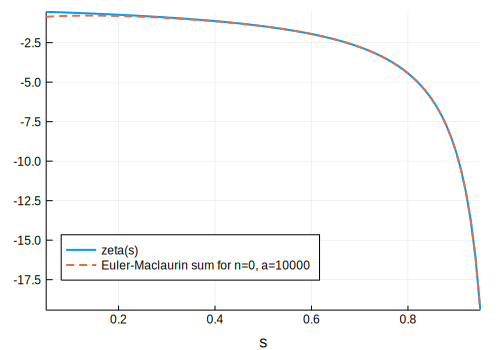

In [13]:
EulerMaclaurinZetaSum0(s, a) = sum(n->n^(-s), 1:a-1) - a^(1-s)/(1-s)
s = 0.05:0.01:0.95
a = 10^4
@time z = zeta.(s)
@time w = EulerMaclaurinZetaSum0.(s, a)
plot(size=(500, 350), legend=:bottomleft, xlabel="s")
plot!(s, z, label="zeta(s)", lw=2)
plot!(s, w, label="Euler-Maclaurin sum for n=0, a=$a", lw=2, ls=:dash)

**問題:** 上と同様にして, $\zeta(s)$ とそのEular-Maclaurin和による近似の $-n < \real s $ での様子について考えてみよ. $\QED$

  0.000189 seconds (29 allocations: 2.406 KiB)
  0.194245 seconds (19.02 k allocations: 1006.212 KiB)


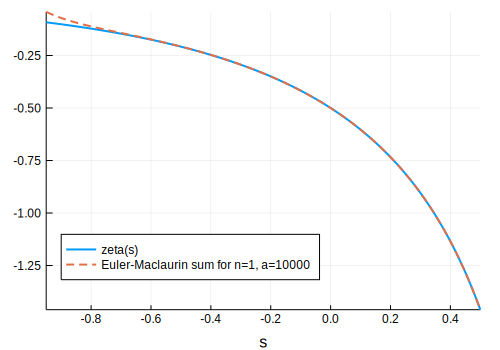

In [14]:
EulerMaclaurinZetaSum1(s, a) = (
    sum(n->n^(-s), 1:a-1) 
    - a^(1-s)/(1-s)
    + 1/(2*a^s)
)

s = -0.95:0.01:0.5
a = 10^4
@time z = zeta.(s)
@time w = EulerMaclaurinZetaSum1.(s, a)
plot(size=(500, 350), legend=:bottomleft, xlabel="s")
plot!(s, z, label="zeta(s)", lw=2)
plot!(s, w, label="Euler-Maclaurin sum for n=1, a=$a", lw=2, ls=:dash)

13-element Array{Tuple{Int64,Float64,Float64},1}:
 (0, -0.5, -0.5)               
 (-1, -0.0833333, -0.0833333)  
 (-2, -0.0, 1.90958e-14)       
 (-3, 0.00833333, 0.00833333)  
 (-4, -0.0, -5.68434e-14)      
 (-5, -0.00396825, -0.00396825)
 (-6, -0.0, -9.45874e-11)      
 (-7, 0.00416667, 0.00416667)  
 (-8, -0.0, -6.51926e-9)       
 (-9, -0.00757576, -0.00757585)
 (-10, -0.0, 0.0)              
 (-11, 0.0210928, 0.0211067)   
 (-12, -0.0, -0.000213623)     

  0.000246 seconds (29 allocations: 3.172 KiB)
  0.537515 seconds (403.94 k allocations: 14.064 MiB, 1.60% gc time)


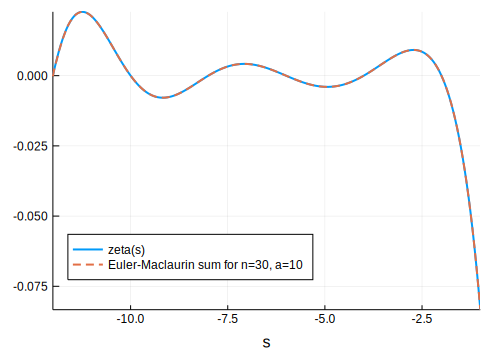

In [15]:
binom(n,k) = exp(lgamma(n+1)-lgamma(k+1)-lgamma(n-k+1))

function EulerMaclaurinZetaSum(n, s, a)
    n == 0 && return EulerMaclaurinZetaSum0(s, a)
    n == 1 && return EulerMaclaurinZetaSum1(s, a)
    ss = float(s)
    (
        sum(n->n^(-ss), 1:a-1) 
        - a^(1-ss)/(1-ss)
        + 1/(2*a^ss)
        - sum(k -> (
                float(BernoulliNumber(k))/(k*a^(ss+k-1))*binom(-s,k-1)
            ), 2:n
        )
    )    
end

[(-m, zeta(-m, 0), EulerMaclaurinZetaSum(30, -m, 10)) for m = 0:12] |> display

n = 30
s = -12:0.05:-1.0
a = 10
@time z = zeta.(s)
@time w = EulerMaclaurinZetaSum.(n, s, a)
plot(size=(500, 350), legend=:bottomleft, xlabel="s")
plot!(s, z, label="zeta(s)", lw=2)
plot!(s, w, label="Euler-Maclaurin sum for n=$n, a=$a", lw=2, ls=:dash)

###  s = 1での様子


